In [1]:
import tensorflow # loading the tensorflow

In [3]:
import numpy as np # import linear algebra lib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # importing the os for path and all
import matplotlib.pyplot as plt # plot plotting lib
import matplotlib.image as mpimg # to plot the image using matplot

In [4]:
# to load the files of newspaper we have to move the curser of jupyter notebook to the directory where files are stored in pc
os.chdir("C:\\Users\\pc\\Desktop\\Coding Ninajs\\DS+ML files\\Untitled Folder")
# changes the current working directory to the given path.
#C:\Users\pc\Desktop\Coding Ninajs\DS+ML files\Untitled Folder

(480, 640, 3)


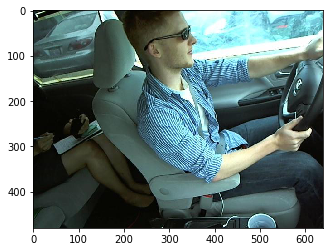

In [5]:
# plotting one of the training image:
each_doc_file=[]# this is a list of all the images in the 10 files of every class 
Classes=[] # classes the images belogs to

for classes in os.listdir("state-farm-distracted-driver-detection/imgs/train"): # os.listdir  ----> it is used for returns a list containing the names of the entries in the directory given by path
    # then go toeach classes one by one
    for img in os.listdir("state-farm-distracted-driver-detection/imgs/train"+"/"+classes):
        # reading the documents in every class
        imgs = mpimg.imread("state-farm-distracted-driver-detection/imgs/train"+"/"+classes+"/"+img)
        first_img=np.array(imgs)
        print(first_img.shape)
        plt.imshow(first_img)
        break
    break

In [9]:
# read training data from CSV file 
img_list = pd.read_csv('state-farm-distracted-driver-detection/driver_imgs_list.csv')
img_list = img_list.sample(frac=1,random_state=0).reset_index(drop=True)  # shuffle the datafilenames = img_list['img'].values
foldernames = img_list['classname'].values
subjectnames = img_list['subject'].values
img_list

,subject,classname,img
0,p075,c7,img_71088.jpg
1,p021,c1,img_15395.jpg
2,p081,c7,img_79763.jpg
3,p026,c8,img_15011.jpg
4,p042,c8,img_68838.jpg
...,...,...,...
22419,p047,c5,img_97152.jpg
22420,p066,c2,img_15170.jpg
22421,p035,c6,img_29323.jpg
22422,p041,c0,img_70605.jpg


In [10]:
# sample data
sample_submission = pd.read_csv('state-farm-distracted-driver-detection/sample_submission.csv')
sample_submission

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...
79721,img_99994.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79722,img_99995.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79723,img_99996.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79724,img_99998.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [26]:
#printing the no of images and classes (total with that images not the unique classes)
images = img_list['img'].values 
classes = img_list['classname'].values
subject= img_list['subject'].values
print(len(classes),len(images),len(subject))

images,classes,subject



22424 22424 22424


(array(['img_71088.jpg', 'img_15395.jpg', 'img_79763.jpg', ...,
        'img_29323.jpg', 'img_70605.jpg', 'img_62590.jpg'], dtype=object),
 array(['c7', 'c1', 'c7', ..., 'c6', 'c0', 'c3'], dtype=object),
 array(['p075', 'p021', 'p081', ..., 'p035', 'p041', 'p015'], dtype=object))

In [83]:
set(foldernames) #  unique classes 

{'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'}

(480, 640, 3)


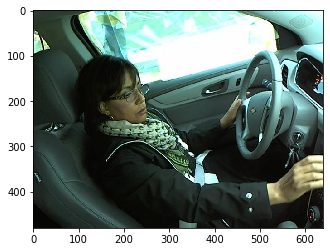

In [33]:
# testing image:
each_doc_file=[]# this is a list of all the images in the 10 files of every class 
Classes=[] # classes the images belogs to

for img_test in os.listdir("state-farm-distracted-driver-detection/imgs/test"): # os.listdir  ----> it is used for returns a list containing the names of the entries in the directory given by path
    # then go toeach classes one by one
    
        imgs = mpimg.imread("state-farm-distracted-driver-detection/imgs/test"+"/"+img_test)
        first_img=np.array(imgs)
        print(first_img.shape)
        plt.imshow(first_img)
        break
        


In [34]:
img_list

,subject,classname,img
0,p075,c7,img_71088.jpg
1,p021,c1,img_15395.jpg
2,p081,c7,img_79763.jpg
3,p026,c8,img_15011.jpg
4,p042,c8,img_68838.jpg
...,...,...,...
22419,p047,c5,img_97152.jpg
22420,p066,c2,img_15170.jpg
22421,p035,c6,img_29323.jpg
22422,p041,c0,img_70605.jpg


In [38]:
# crete the dict having the classes as key and the images belong to that class as the values
import csv
data={} # initiate the dict
with open ('state-farm-distracted-driver-detection/driver_imgs_list.csv') as f:  #opening the image csv file
    reader=csv.reader(f) #reading the file
    next(reader) # leaving the first row having names and all
    for row in reader: 
        key= row[1]# making the dict
        if key in data:
        
            data[key].append(row[2])
        else:
            data[key]=[row[2]]
data['c1']

['img_16856.jpg',
 'img_8410.jpg',
 'img_15559.jpg',
 'img_58564.jpg',
 'img_4562.jpg',
 'img_54810.jpg',
 'img_96357.jpg',
 'img_51439.jpg',
 'img_92674.jpg',
 'img_11478.jpg',
 'img_51195.jpg',
 'img_74250.jpg',
 'img_31239.jpg',
 'img_86126.jpg',
 'img_69281.jpg',
 'img_90114.jpg',
 'img_51227.jpg',
 'img_9231.jpg',
 'img_98099.jpg',
 'img_70150.jpg',
 'img_16466.jpg',
 'img_53097.jpg',
 'img_58253.jpg',
 'img_77658.jpg',
 'img_54734.jpg',
 'img_26722.jpg',
 'img_13840.jpg',
 'img_6329.jpg',
 'img_99248.jpg',
 'img_80450.jpg',
 'img_13160.jpg',
 'img_42960.jpg',
 'img_76849.jpg',
 'img_67955.jpg',
 'img_62530.jpg',
 'img_665.jpg',
 'img_85979.jpg',
 'img_14857.jpg',
 'img_50388.jpg',
 'img_20320.jpg',
 'img_5877.jpg',
 'img_85210.jpg',
 'img_52037.jpg',
 'img_25477.jpg',
 'img_37212.jpg',
 'img_49167.jpg',
 'img_35243.jpg',
 'img_98983.jpg',
 'img_38431.jpg',
 'img_1472.jpg',
 'img_79050.jpg',
 'img_1916.jpg',
 'img_100777.jpg',
 'img_59434.jpg',
 'img_75887.jpg',
 'img_11776.jpg',


In [40]:
classes=list(data.keys()) # printing the classes which are keys of the dict we made
classes

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [57]:
# creating the master_directory this will help us to keep the training and testing imges for model
import os

os.mkdir('master_data')
os.mkdir('master_data/training')
os.mkdir('master_data/testing')

In [58]:
# sub-directory in training and testing 
for cls in classes:
  os.mkdir(os.path.join('master_data/training/', cls))
  os.mkdir(os.path.join('master_data/testing/', cls))
    # these are empty and lets put the images in it

In [59]:
from shutil import copyfile  # copying the files to master directory so that we can use them further
split_size = 0.8 # 80% image for training and remaining for testing

for cls, images in data.items():
  train_size = int(split_size*len(images))
  train_images = images[:train_size]
  test_images = images[train_size:]
  for image in train_images:
    source = os.path.join('state-farm-distracted-driver-detection/imgs/train'+"/"+cls, image)
    #imgs = mpimg.imread(source)
    #first_img=np.array(imgs)
    #print(first_img.shape)
    #plt.imshow(first_img)
    dest = os.path.join('master_data/training'+"/" +cls,image)
    copyfile(source, dest) # copy training images
  for image in test_images:
    source = os.path.join('state-farm-distracted-driver-detection/imgs/train'+"/"+cls, image)
    dest = os.path.join('master_data/testing'+"/" +cls, image)
    copyfile(source, dest)  # copying the testing images

In [1]:
# calling cnn 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [2]:
model = tf.keras.models.Sequential()  # model object
# making the cnn model with 3 cnn layers having the padding 2*2 and inpu size of image as 100*100*3
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
## Dense & Output the ouput layer is of size 10
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer = Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary() # printing the model summary

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 98, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
____

In [3]:
train_dir = 'master_data/training'
test_dir = 'master_data/testing'
# initilia the training and test gen
train_datagen = ImageDataGenerator(rescale = 1.0/255) # initilize the object of image data generator class
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size = (100, 100),
                                                    class_mode = 'categorical',
                                                    batch_size = 70
                                                  )
test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory(
                                                    test_dir,
                                                    target_size = (100, 100),
                                                    class_mode = 'categorical',
                                                    batch_size = 70
                                                  )

Found 17934 images belonging to 10 classes.
Found 4490 images belonging to 10 classes.


In [4]:
es = EarlyStopping(monitor='val_acc', patience = 2, min_delta=0.01) # early stopping call back

In [5]:
# training the model
model.fit_generator(train_generator,
                    epochs = 10,
                    verbose = 1,
                    validation_data = test_generator,
                    callbacks = [es])

Epoch 1/10
257/257 [==============================] - 3205s 12s/step - loss: 0.9899 - acc: 0.6810 - val_loss: 4.3263 - val_acc: 0.2543
Epoch 2/10
257/257 [==============================] - 3480s 14s/step - loss: 0.3608 - acc: 0.8891 - val_loss: 4.5257 - val_acc: 0.2822
Epoch 3/10
257/257 [==============================] - 3450s 13s/step - loss: 0.2329 - acc: 0.9317 - val_loss: 4.4150 - val_acc: 0.3307
Epoch 4/10
257/257 [==============================] - 3730s 15s/step - loss: 0.1575 - acc: 0.9562 - val_loss: 3.0355 - val_acc: 0.3646
Epoch 5/10
257/257 [==============================] - 3470s 14s/step - loss: 0.1629 - acc: 0.9558 - val_loss: 10.6566 - val_acc: 0.2314
Epoch 6/10
257/257 [==============================] - 3323s 13s/step - loss: 0.3681 - acc: 0.8961 - val_loss: 3.0405 - val_acc: 0.3764
Epoch 7/10
257/257 [==============================] - 3347s 13s/step - loss: 0.1511 - acc: 0.9601 - val_loss: 2.8341 - val_acc: 0.3670
Epoch 8/10
257/257 [==============================] - 

'results = model.fit(x_train,Y_train,\n                    batch_size=70,epochs=10,\n                    verbose=1,\n                    validation_data=(x_test,Y_test),\n                    callbacks=callback)'

# here we got val_acc of 33% 


# --------------------

# LET'S   try to train it with some other params :-

In [2]:
import tensorflow as tf # importing tensorflow

In [3]:
import numpy as np # import linear algebra lib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # importing the os for path and all
import matplotlib.pyplot as plt # plot plotting lib
import matplotlib.image as mpimg # to plot the image using matplot

In [4]:
# to load the files of newspaper we have to move the curser of jupyter notebook to the directory where files are stored in pc
os.chdir("C:\\Users\\pc\\Desktop\\Coding Ninajs\\DS+ML files\\Untitled Folder")
# changes the current working directory to the given path.
#C:\Users\pc\Desktop\Coding Ninajs\DS+ML files\Untitled Folder

In [5]:
train_imgs = "state-farm-distracted-driver-detection/imgs/train"  # path for training images
test_imgs = 'state-farm-distracted-driver-detection/imgs/test' # path for testing images
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'] # classes in which images are categorised

(480, 640, 3)


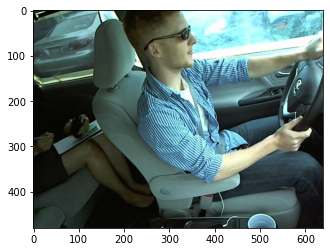

In [6]:
# plotting one of the training image:
each_doc_file=[]# this is a list of all the images in the 10 files of every class 
Classes=[] # classes the images belogs to

for classes in os.listdir("state-farm-distracted-driver-detection/imgs/train"): # os.listdir  ----> it is used for returns a list containing the names of the entries in the directory given by path
    # then go toeach classes one by one
    for img in os.listdir("state-farm-distracted-driver-detection/imgs/train"+"/"+classes):
        # reading the documents in every class
        imgs = mpimg.imread("state-farm-distracted-driver-detection/imgs/train"+"/"+classes+"/"+img)
        first_img=np.array(imgs)
        print(first_img.shape) # printing the shape of the image
        plt.imshow(first_img) # plotting the image
        break
    break # here we are plotting only one image for now

(480, 640, 3)


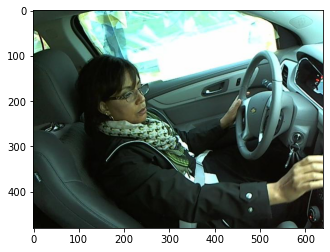

In [33]:
# testing image:
each_doc_file=[]# this is a list of all the images in the 10 files of every class 
Classes=[] # classes the images belogs to

for img_test in os.listdir("state-farm-distracted-driver-detection/imgs/test"): # os.listdir  ----> it is used for returns a list containing the names of the entries in the directory given by path
    # then go toeach classes one by one
    
        imgs = mpimg.imread("state-farm-distracted-driver-detection/imgs/test"+"/"+img_test)
        first_img=np.array(imgs)
        print(first_img.shape)# printng the shape of the testing image
        plt.imshow(first_img) # plotting the image
        break
        # plotting only one image


In [7]:
# read training data from CSV file 
img_list = pd.read_csv('state-farm-distracted-driver-detection/driver_imgs_list.csv')
img_list = img_list.sample(frac=1,random_state=0).reset_index(drop=True)  # shuffle the datafilenames = img_list['img'].values
foldernames = img_list['classname'].values
subjectnames = img_list['subject'].values
img_list # list of images in csv along their class

,subject,classname,img
0,p075,c7,img_71088.jpg
1,p021,c1,img_15395.jpg
2,p081,c7,img_79763.jpg
3,p026,c8,img_15011.jpg
4,p042,c8,img_68838.jpg
...,...,...,...
22419,p047,c5,img_97152.jpg
22420,p066,c2,img_15170.jpg
22421,p035,c6,img_29323.jpg
22422,p041,c0,img_70605.jpg


In [8]:
# sample data
sample_submission = pd.read_csv('state-farm-distracted-driver-detection/sample_submission.csv')
sample_submission # sample data

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,img_10.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,img_100.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,img_1000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,img_100000.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...
79721,img_99994.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79722,img_99995.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79723,img_99996.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
79724,img_99998.jpg,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [10]:
# importing different modules and neural network to train the model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [29]:

model= tf.keras.models.Sequential()# calling model object 
# making a model having covo layer and pooling of 2*2 & then adding the dense layer and final dense layer will be of 10
# as we have 10 output classes 
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (240, 240, 3), data_format = 'channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu')) # convov layer 2
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))# convo layer 3
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 10, activation = 'sigmoid')) # final dense layer / op layer
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary() # summary of the model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 238, 238, 128)     3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 119, 119, 128)     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 117, 117, 64)      73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)            

In [30]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, # initilize the object of image data generator class
                                   horizontal_flip = True, 
                                   validation_split = 0.2)

training_set = train_datagen.flow_from_directory("state-farm-distracted-driver-detection/imgs/train", 
                                                 target_size = (240, 240), 
                                                 batch_size = 32,
                                                 subset = 'training')

validation_set = train_datagen.flow_from_directory("state-farm-distracted-driver-detection/imgs/train", 
                                                   target_size = (240, 24# initilize the object of image data generator class0), 
                                                   batch_size = 32,
                                                   subset = 'validation')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [31]:
# early stopping call back
es = EarlyStopping(monitor='val_acc', patience = 2, min_delta=0.01) # early stopping call back

In [32]:
# training the model 
model.fit_generator(training_set,
                         
                         epochs = 2,
                         validation_data = validation_set,
                         callbacks=[es])
 

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 561 steps, validate for 141 steps
Epoch 1/2
561/561 [==============================] - 5030s 9s/step - loss: 1.2124 - accuracy: 0.5723 - val_loss: 0.4952 - val_accuracy: 0.8373
Epoch 2/2
561/561 [==============================] - 4905s 9s/step - loss: 0.3394 - accuracy: 0.8932 - val_loss: 0.2636 - val_accuracy: 0.9112


'\nmodel.fit_generator(training_set,\n                         \n                         epochs = 1,\n                         validation_data = validation_set,\n                         callbacks=[es])\n'

# we got an accuracy of 89% and val_acc of 91% after training the model

# taking the prediction on one of the testing image: -

In [66]:
# taking the prediction on one of the testing image: -
from tensorflow import keras
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img
image_path = "state-farm-distracted-driver-detection/imgs/test/img_1000.jpg"
image = load_img(path=image_path, target_size=(100, 100))
input_arr = img_to_array(image)
input_arr = np.array([input_arr])  
pred= model.predict(input_arr)

In [102]:
 # prediction for the above image
classes=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
classes_name={'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3':' texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}
pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [103]:
# prediction class and name 
for i in range(len(pred[0])):
    if pred[0][i] ==1.0:
        print(classes[i],classes_name[classes[i]])
    

c8 hair and makeup


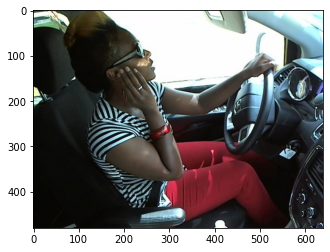

In [100]:
# image on which pred 
image_path = "state-farm-distracted-driver-detection/imgs/test/img_1000.jpg"
image = load_img(path=image_path)
plt.imshow(image)
#$ Its look like this lady is touching her face or side hair

# FINAL VAL_ACC = 91%